## Preparing the lab environment

- Create a dataset directory
- download the file to the *datasets* directory

In [1]:
!mkdir datasets

### Download the dataset

In [2]:
!gdown --id 18Ulneqq0CSsuPPva9F4If-OFJkn7rj4M -O datasets/sigma.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18Ulneqq0CSsuPPva9F4If-OFJkn7rj4M
To: /content/datasets/sigma.zip
100% 122M/122M [00:00<00:00, 171MB/s]


In [3]:
ls -al datasets/

total 118852
drwxr-xr-x 2 root root      4096 Jun 23 07:09 ./
drwxr-xr-x 1 root root      4096 Jun 23 07:09 ../
-rw-r--r-- 1 root root 121693383 Jun 23 07:09 sigma.zip


### Unzip the dataset

In [4]:
!unzip datasets/sigma.zip -d datasets/

Archive:  datasets/sigma.zip
  inflating: datasets/train.csv      
  inflating: datasets/sample_submission.csv  
  inflating: datasets/test.csv       


In [5]:
!ls -al datasets/

total 2916732
drwxr-xr-x 2 root root       4096 Jun 23 07:09 .
drwxr-xr-x 1 root root       4096 Jun 23 07:09 ..
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Jun 23 07:09 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv


## Benchmarking Various File Formats

- csv
- pickle
- feather
- parquet

### Reading the CSV File

In [6]:
import pandas as pd
import os

In [7]:
%%time

train_df = pd.read_csv("./datasets/train.csv")

CPU times: user 9.53 s, sys: 751 ms, total: 10.3 s
Wall time: 10.3 s


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/execution.py:1193: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


In [8]:
train_df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [10]:
train_df.shape

(903653, 12)

In [11]:
train_df.head(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


### Optimizing data types

In [12]:
dtypes = {
    "channelGrouping": "str",
    "date": "int16",
    "device": "str",
    "fullVisitorId": "str",
    "geoNetwork": "str",
    "sessionId": "str",
    "socialEngagementType": "str",
    "totals": "str",
    "trafficSource": "str", 
    "visitId": "uint16",
    "visitNumber": "int16",
    "visitStartTime": "uint16"   
}

In [13]:
train_new_df = pd.read_csv("./datasets/train.csv", dtype = dtypes)

In [14]:
train_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int16 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  uint16
 10  visitNumber           903653 non-null  int16 
 11  visitStartTime        903653 non-null  uint16
dtypes: int16(2), object(8), uint16(2)
memory usage: 62.0+ MB


### Creating other file formats 

In [15]:
train_new_df.to_pickle("./datasets/train.pkl")

In [16]:
ls -al datasets/

total 3050344
drwxr-xr-x 2 root root       4096 Jun 23 07:11 ./
drwxr-xr-x 1 root root       4096 Jun 23 07:09 ../
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Jun 23 07:09 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv
-rw-r--r-- 1 root root  136817990 Jun 23 07:11 train.pkl


In [18]:
train_new_df.to_parquet("./datasets/train.parquet")

In [19]:
!ls -al datasets/

total 3137912
drwxr-xr-x 2 root root       4096 Jun 23 07:11 .
drwxr-xr-x 1 root root       4096 Jun 23 07:09 ..
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Jun 23 07:09 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv
-rw-r--r-- 1 root root   89669570 Jun 23 07:11 train.parquet
-rw-r--r-- 1 root root  136817990 Jun 23 07:11 train.pkl


### Comparing file sizes of different formats

In [21]:
filenames = ['./datasets/train.csv', 
             './datasets/train.pkl', 
             './datasets/train.parquet']

all_filesizes = [os.path.getsize(f) for f in filenames]             
 
filescompare_df = pd.DataFrame( { "formats" : filenames,
                                  "filesize": all_filesizes})

In [22]:
filescompare_df

,formats,filesize
0,./datasets/train.csv,1503430926
1,./datasets/train.pkl,136817990
2,./datasets/train.parquet,89669570


In [23]:
import matplotlib.pyplot as plt
import seaborn as sn

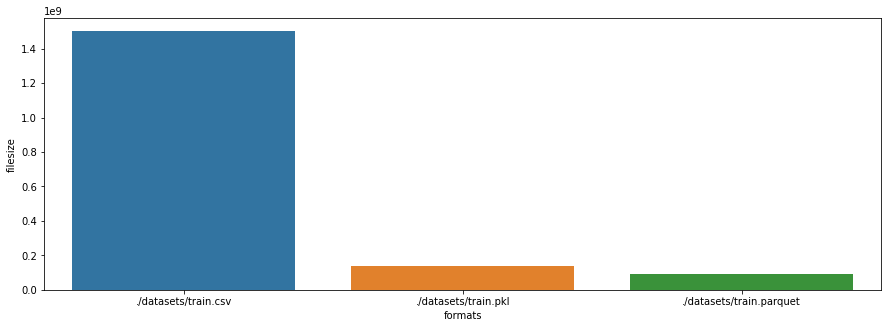

In [24]:
plt.figure( figsize = (15, 5) )
sn.barplot( data = filescompare_df,
           x = 'formats',
           y = 'filesize');

### Read time benchmarking of different formats

In [25]:
%%time 

train_pkl_df = pd.read_pickle("./datasets/train.pkl")

CPU times: user 424 ms, sys: 160 ms, total: 584 ms
Wall time: 578 ms


In [26]:
%%time 

train_parquet_df = pd.read_parquet("./datasets/train.parquet")

CPU times: user 1.85 s, sys: 1.56 s, total: 3.41 s
Wall time: 2.96 s


In [27]:
import time

t1 = time.perf_counter()
train_df = pd.read_csv("./datasets/train.csv")
time_csv = time.perf_counter() - t1

t1 = time.perf_counter()
train_pkl_df = pd.read_pickle("./datasets/train.pkl")
time_pkl = time.perf_counter() - t1

t1 = time.perf_counter()
train_parquet_df = pd.read_parquet("./datasets/train.parquet")
time_parquet = time.perf_counter() - t1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
filescompare_df['read_time'] = [time_csv, time_pkl, time_parquet]

In [31]:
filescompare_df

,formats,filesize,read_time
0,./datasets/train.csv,1503430926,10.532994
1,./datasets/train.pkl,136817990,0.572166
2,./datasets/train.parquet,89669570,2.007003


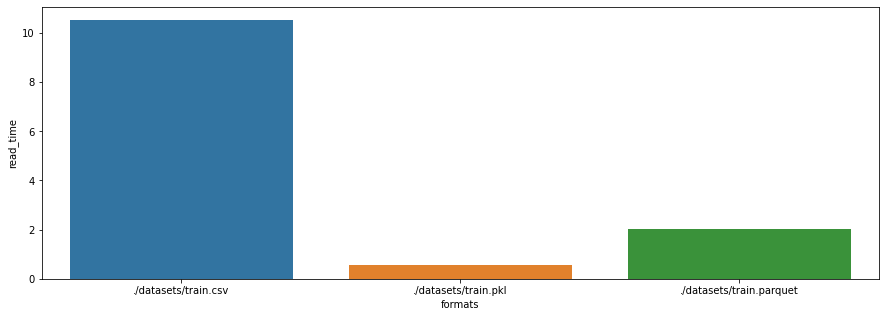

In [32]:
plt.figure( figsize = (15, 5) )
sn.barplot( data = filescompare_df,
           x = 'formats',
           y = 'read_time');

In [33]:
train_parquet_df.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

### Reading specific columns

In [37]:
%%time 

train_parquet_df = pd.read_parquet("./datasets/train.parquet", columns = ['channelGrouping','sessionId', 'totals'])

CPU times: user 454 ms, sys: 174 ms, total: 628 ms
Wall time: 493 ms
